### QUESTION 1: 

Report the following statistics for each hashtag, i.e. each file:
* Average number of tweets per hour
* Average number of followers of users posting the tweets per tweet (to make it simple, we average over the number of tweets; if a users posted twice, we count the user and the user’s followers twice as well)
* Average number of retweets per tweet

In [1]:
hash_tags = ['#gohawks','#gopatriots','#nfl','#patriots','#sb49','#superbowl']

In [98]:
files = ['data/tweets_{}.txt'.format(h) for h in hash_tags]

In [99]:
import json

# https://stackoverflow.com/questions/8009882/how-to-read-a-large-file-line-by-line-in-python
def getJSON(filename):
    json_objs = []
    with open(filename) as f:        
        for line in f:
            json_object = json.loads(line) 
            json_objs.append(json_object)
    return json_objs

* Average number of tweets per hour

In [2]:
import datetime
import pytz

def getHour(timestamp):
    d = datetime.datetime.fromtimestamp(timestamp)
    pst = pytz.timezone('America/Los_Angeles')
    d = pst.localize(d)
    return d.hour

def getLocalHour(timestamp):
    d = datetime.datetime.fromtimestamp(timestamp)
    pst = pytz.timezone('America/Los_Angeles')
    d = pst.localize(d)
    return "{}:{}:{}:{}".format(d.year,d.month,d.day,d.hour)

def getLocalDay(timestamp):
    d = datetime.datetime.fromtimestamp(timestamp)
    pst = pytz.timezone('America/Los_Angeles')
    d = pst.localize(d)
    return "{}:{}:{}".format(d.year,d.month,d.day)

In [47]:
import numpy as np

def getTweetsPerHour(json_arr):
    hourToTweets = {}
    for json_object in json_arr:
        key = getLocalHour(json_object['citation_date'])
        if key not in hourToTweets.keys():
            hourToTweets[key]=0
        hourToTweets[key]+=1
    countValues = list(hourToTweets.values())
    return np.mean(countValues)

In [48]:
for h in hash_tags:
    json_arr = getJSON('data/tweets_{}.txt'.format(h))
    val = getTweetsPerHour(json_arr)
    print("Average number of tweets/hr for {} = {}".format(h,val))

Average number of tweets/hr for #gohawks = 296.70526315789476
Average number of tweets/hr for #gopatriots = 53.31292517006803
Average number of tweets/hr for #nfl = 399.69468267581476
Average number of tweets/hr for #patriots = 750.6320272572402
Average number of tweets/hr for #sb49 = 1384.8212290502793
Average number of tweets/hr for #superbowl = 2067.824531516184


* Average number of followers of users posting the tweets per tweet (to make it simple, we average over the number of tweets; if a users posted twice, we count the user and the user’s followers twice as well)

In [49]:
def getAverageFollowersPerTweet(json_arr):
    followerCount = 0.0
    tweetCount = 0.0
    for json_object in json_arr:
        followerCount+=json_object['author']['followers']
        tweetCount+=1
    return followerCount/tweetCount

In [50]:
for h in hash_tags:
    json_arr = getJSON('data/tweets_{}.txt'.format(h))
    val = getAverageFollowersPerTweet(json_arr)
    print("Average number of followers/user for {} = {}".format(h,val))

Average number of followers/user for #gohawks = 2217.9237355281984
Average number of followers/user for #gopatriots = 1427.2526051635405
Average number of followers/user for #nfl = 4662.37544523693
Average number of followers/user for #patriots = 3280.4635616550277
Average number of followers/user for #sb49 = 10374.160292019487
Average number of followers/user for #superbowl = 8814.96799424623


Average number of retweets per tweet

In [51]:
def getAverageRetweetsPerTweet(json_arr):
    tweetCount = 0.0
    retweetCount = 0.0
    for json_object in json_arr:
        retweetCount+=json_object['metrics']['citations']['total']
        tweetCount+=1
    return retweetCount/tweetCount

In [52]:
for h in hash_tags:
    json_arr = getJSON('data/tweets_{}.txt'.format(h))
    val = getAverageRetweetsPerTweet(json_arr)
    print("Average number of retweets/tweet for {} = {}".format(h,val))

Average number of retweets/tweet for #gohawks = 2.0132093991319877
Average number of retweets/tweet for #gopatriots = 1.4081919101697078
Average number of retweets/tweet for #nfl = 1.5344602655543254
Average number of retweets/tweet for #patriots = 1.7852871288476946
Average number of retweets/tweet for #sb49 = 2.52713444111402
Average number of retweets/tweet for #superbowl = 2.3911895819207736


### QUESTION 2
Plot “number of tweets in hour” over time for #SuperBowl and #NFL (a histogram with 1-hour bins). The tweets are stored in separate files for different hashtags and files are named as tweet_[#hashtag].txt. Use the hours in a 24-hour day as markers, and count the number of tweets in each of these periods.


In [3]:
MODE='FRESH'

import pickle

def save_object(data, fileName):
    with open(fileName + ".pickle", 'wb') as f:
        pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)
        
def load_object(fileName):
    try:
        with open(fileName + ".pickle", 'rb') as f:
            data = pickle.load(f)
            return data
    except IOError:
        print("Could not read file: " + fileName)

In [4]:
from datetime import date, timedelta
import datetime

#https://stackoverflow.com/questions/2315032/how-do-i-find-missing-dates-in-a-list-of-sorted-dates
def getAllDays(dayStrList):
    dayList = [ datetime.datetime.strptime(x, '%Y:%m:%d') for x in dayStrList ]
    
    irange = [i for i in range((dayList[-1] - dayList[0]).days)]
    irange.append(irange[-1]+1)
    
    allDaysList = sorted(list(set(dayList[0] + timedelta(x) for x in irange)))
    allDayStrList = [ ('{}:{}:{}'.format(d.year,d.month,d.day)) for d in allDaysList ]
    return allDayStrList

Started #nfl
[0, 1]
2015:1:15
2015:1:16


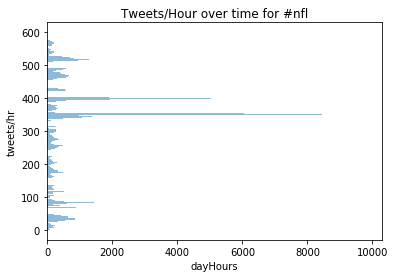

Started #superbowl
[0, 1]
2015:1:15
2015:1:16


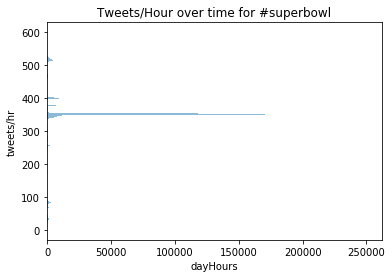

In [45]:
import matplotlib.pyplot as plt
from datetime import date, timedelta
import numpy as np
import json

def plotBarChart(vals,xlabel,ylabel,title):
    x_pos = np.arange(len(vals))
    plt.barh(x_pos, vals, align='center', alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

tmp_hashtags = ['#nfl','#superbowl']

for tag in tmp_hashtags:
    print("Started "+tag);
    hourToTweets = {}
    dayDict = {}
    filename = 'data/tweets_'+tag+'.txt'
    with open(filename) as f:
        for line in f:
            json_object = json.loads(line)
            dayDict[getLocalDay(json_object['citation_date'])]=1        
            key = getLocalHour(json_object['citation_date'])
            if key not in hourToTweets.keys():
                hourToTweets[key]=0
            hourToTweets[key]+=1    
            
    valList = []
    dayList = getAllDays(list(dayDict.keys()))
    
    for day in dayList:
        print(day)
    
    for day in list(dayDict.keys()):
        for h in range(1,25):
            key=day+':'+str(h)
            valList.append(hourToTweets.get(key,0))
    save_object(valList,'q2_valList:{}'.format(tag))
    plotBarChart(valList,'dayHours','tweets/hr','Tweets/Hour over time for {}'.format(tag))

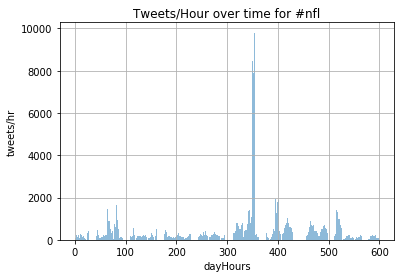

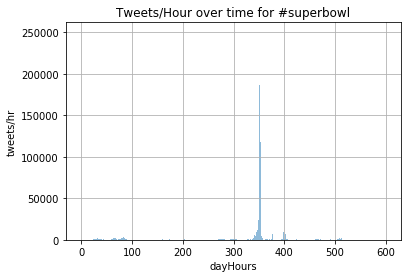

In [47]:
def plotBarChart(vals,xlabel,ylabel,title):
    x_pos = np.arange(len(vals))
    plt.bar(x_pos, vals, align='center', alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.show()
    
for tag in tmp_hashtags:
    valList = load_object('q2_valList:{}'.format(tag))
    plotBarChart(valList,'dayHours','tweets/hr','Tweets/Hour over time for {}'.format(tag))

For every hour, create features with below data:
* Number of tweets
* Total number of retweets
* Sum of the number of followers of the users posting the hashtag
* Maximum number of followers of the users posting the hashtag
* Time of the day (which could take 24 values that represent hours of the day with respect to a given time zone)

In [5]:
def getFeatures(hash_tag):
    hourToTweets = {}
    hourToRetweets = {}
    hourToFollowerCount = {}
    hourToMaxFollowers = {}
    dayDict = {}
    features = []
    labels = []
    
    filename = 'data/tweets_'+tag+'.txt'
    with open(filename) as f:
        for line in f:
            json_object = json.loads(line)
            timestamp = json_object['citation_date']
            dayDict[getLocalDay(timestamp)]=1        
            key = getLocalHour(timestamp)
            if key not in hourToTweets.keys():
                hourToTweets[key]=0
            hourToTweets[key]+=1
            
            retweetCount = json_object['metrics']['citations']['total']        
            
            if key not in hourToRetweets.keys():
                hourToRetweets[key]=0
            hourToRetweets[key]+=retweetCount
        
            followerCount = json_object['author']['followers']
            if key not in hourToFollowerCount.keys():
                hourToFollowerCount[key]=0
            hourToFollowerCount[key]+=followerCount
        
            if key not in hourToMaxFollowers.keys():
                hourToMaxFollowers[key]=0
            hourToMaxFollowers[key] = max(hourToMaxFollowers[key],followerCount)
            
        dayList = getAllDays(list(dayDict.keys()))
#         print(dayList)
            
        for day in dayList:
            for h in range(0,24):
                key=day+':'+str(h)
                tweetCount = hourToTweets.get(key, 0)
                retweetCount = hourToRetweets.get(key,0)
                followerCount = hourToFollowerCount.get(key,0)
                maxFollowers = hourToMaxFollowers.get(key,0)

                feature = [tweetCount, retweetCount, followerCount, maxFollowers, h]
                features.append(feature)
                
                nexthour = datetime.datetime.strptime(key, '%Y:%m:%d:%H') + timedelta(hours=1)
                nexthourkey = "{}:{}:{}:{}".format(nexthour.year,nexthour.month,nexthour.day,nexthour.hour)
#                 print(nexthourkey)
                labels.append(hourToTweets.get(nexthourkey,0))
                
    return features,labels

For each hashtag data file, fit a linear regression model using the following 5 features to predict
number of tweets in the next hour, with features extracted from tweet data in the previous
hour.

In [106]:
for tag in hash_tags:
    print("Started {}".format(tag))
    features,labels = getFeatures(tag)
    save_object(features,'q2features_{}'.format(tag))
    save_object(labels,'q2labels_{}'.format(tag))
    print("Finished {}".format(tag))

Started #gohawks
['2015:1:15', '2015:2:3', '2015:1:31', '2015:1:30', '2015:1:20', '2015:1:21', '2015:1:22', '2015:1:23', '2015:1:24', '2015:1:25', '2015:1:26', '2015:1:27', '2015:1:28', '2015:1:29', '2015:1:16', '2015:1:19', '2015:1:18', '2015:2:6', '2015:2:7', '2015:2:4', '2015:2:5', '2015:2:2', '2015:1:14', '2015:1:17', '2015:2:1']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Finished #gohawks
Started #gopatriots
['2015:1:15', '2015:2:3', '2015:1:31', '2015:2:1', '2015:1:20', '2015:1:21', '2015:1:22', '2015:1:23', '2015:1:24', '2015:1:25', '2015:1:26', '2015:1:27', '2015:1:28', '2015:1:29', '2015:1:30', '2015:1:19', '2015:1:18', '2015:2:6', '2015:2:4', '2015:2:5', '2015:2:2', '2015:1:14', '2015:1:17', '2015:1:16']
[0]
Finished #gopatriots
Started #nfl
['2015:1:15', '2015:2:3', '2015:1:31', '2015:1:30', '2015:1:20', '2015:1:21', '2015:1:22', '2015:1:23', '2015:1:24', '2015:1:25', '2015:1:26', '2015:1:27', '2015:1:28', '2015:1:29', '2015:2:1', '2015:1:19', '2015:1:18', '2

### QUESTION 3: 
For each of your models, report your model’s Mean Squared Error (MSE) and R-squared measure. Also, analyse the significance of each feature using the t-test and p-value. You may use the OLS in the libarary statsmodels in Python.

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

for tag in hash_tags:
    print('\nLinear Regression Model for {}'.format(tag))
    X = load_object('q2features_{}'.format(tag))
    y = load_object('q2labels_{}'.format(tag))
    model = sm.OLS(y,X)
    results = model.fit()
    print(results.summary())


Linear Regression Model for #gohawks
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     87.91
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           2.05e-63
Time:                        11:08:31   Log-Likelihood:                -3599.5
No. Observations:                 432   AIC:                             7209.
Df Residuals:                     427   BIC:                             7229.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            

### QUESTION 4: 
Design a regression model using any features from the papers you find or other new features you may find useful for this problem. Fit your model on the data of each hashtag and report fitting MSE and significance of features.


We will consider below features:

* Average impressions = total impressions / total tweets (for a particular hour)
* Average ranking score = total ranking / total tweets (for a particular hour)
* Average User Passivity(for original user) = total passivity / total tweets (for a particular hour)

In [29]:
a = datetime.datetime.strptime("Sun Jul 07 18:09:55 +0000 2013","%a %b %d %H:%M:%S %z %Y")
b = datetime.datetime.strptime("Sun Jul 10 18:09:55 +0000 2014","%a %b %d %H:%M:%S %z %Y")
print((b-a).days)
print(b.tzinfo)
print(b.)

368
UTC


In [32]:
import json

# https://arxiv.org/pdf/1401.2018v2.pdf
def getUserPassivity(user,ts):
    createdDateTimeObj = datetime.datetime.strptime(user['created_at'],"%a %b %d %H:%M:%S %z %Y")
    created = datetime.datetime.fromtimestamp(createdDateTimeObj.timestamp())
    d = datetime.datetime.fromtimestamp(ts)
    td = (created - d).days
    statuses_count = user['statuses_count']
    return td/(1.0+statuses_count)
    
def getFeatures(hash_tag):
    hourToTweets = {}
    hourToRetweets = {}
    hourToFollowerCount = {}
    hourToMaxFollowers = {}
    hourToUserPassivitySum = {}
    hourToRankingMetricSum = {}
    hourToImpressionsMetricSum = {}
    dayDict = {}
    features = []
    labels = []
    
    filename = 'data/tweets_'+tag+'.txt'
    with open(filename) as f:
        for line in f:
            json_object = json.loads(line)
            timestamp = json_object['citation_date']
            dayDict[getLocalDay(timestamp)]=1        
            key = getLocalHour(timestamp)
            
            if key not in hourToUserPassivitySum.keys():
                hourToUserPassivitySum[key]=0.0
            hourToUserPassivitySum[key]+=getUserPassivity(json_object['tweet']['user'],timestamp)
            
            if key not in hourToRankingMetricSum.keys():
                hourToRankingMetricSum[key]=0.0
            hourToRankingMetricSum[key]+=json_object['metrics']['ranking_score']
            
            if key not in hourToImpressionsMetricSum.keys():
                hourToImpressionsMetricSum[key]=0.0
            hourToImpressionsMetricSum[key]+=json_object['metrics']['impressions']
            
            if key not in hourToTweets.keys():
                hourToTweets[key]=0
            hourToTweets[key]+=1
            
            retweetCount = json_object['metrics']['citations']['total']        
            
            if key not in hourToRetweets.keys():
                hourToRetweets[key]=0
            hourToRetweets[key]+=retweetCount
        
            followerCount = json_object['author']['followers']
            if key not in hourToFollowerCount.keys():
                hourToFollowerCount[key]=0
            hourToFollowerCount[key]+=followerCount
        
            if key not in hourToMaxFollowers.keys():
                hourToMaxFollowers[key]=0
            hourToMaxFollowers[key] = max(hourToMaxFollowers[key],followerCount)
            
        dayList = getAllDays(list(dayDict.keys()))
#         print(dayList)
            
        for day in dayList:
            for h in range(0,24):
                key=day+':'+str(h)
                tweetCount = hourToTweets.get(key, 0)
                retweetCount = hourToRetweets.get(key,0)
                followerCount = hourToFollowerCount.get(key,0)
                maxFollowers = hourToMaxFollowers.get(key,0)
                if tweetCount > 0:
                    avgRanking = hourToRankingMetricSum.get(key,0)/tweetCount
                    avgImpressions = hourToImpressionsMetricSum.get(key,0)/tweetCount
                    avgUserPassivity = hourToUserPassivitySum.get(key,0)/tweetCount                
                else:
                    avgRanking = 0
                    avgImpressions = 0
                    avgUserPassivity = 0

                feature = [tweetCount, retweetCount, followerCount, maxFollowers, avgRanking,avgImpressions,avgUserPassivity, h]
                features.append(feature)
                
                nexthour = datetime.datetime.strptime(key, '%Y:%m:%d:%H') + timedelta(hours=1)
                nexthourkey = "{}:{}:{}:{}".format(nexthour.year,nexthour.month,nexthour.day,nexthour.hour)
                labels.append(hourToTweets.get(nexthourkey,0))
                
    return features,labels

In [33]:
for tag in hash_tags:
    print("Started {}".format(tag))
    features,labels = getFeatures(tag)
    save_object(features,'q4features_{}'.format(tag))
    save_object(labels,'q4labels_{}'.format(tag))
    print("Finished {}".format(tag))

Started #gohawks
Finished #gohawks
Started #gopatriots
Finished #gopatriots
Started #nfl
Finished #nfl
Started #patriots
Finished #patriots
Started #sb49
Finished #sb49
Started #superbowl
Finished #superbowl


In [34]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

for tag in hash_tags:
    print('\nLinear Regression Model for {}'.format(tag))
    X = load_object('q4features_{}'.format(tag))
    y = load_object('q4labels_{}'.format(tag))
    model = sm.OLS(y,X)
    results = model.fit()
    print(results.summary())


Linear Regression Model for #gohawks
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     66.98
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           4.21e-75
Time:                        13:01:03   Log-Likelihood:                -4345.7
No. Observations:                 528   AIC:                             8707.
Df Residuals:                     520   BIC:                             8742.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            

### QUESTION 5: 
For each of the top 3 features (i.e. with the smallest p-values) in your measurements, draw a scatter plot of predictant (number of tweets for next hour) versus value of that feature, using all the samples you have extracted, and analyze it.
Do the regression coefficients agree with the trends in the plots? If not, why?